In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./dataset/2019-Oct.csv')
print(f'total: {len(df)}')
df.head()

total: 42448764


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [3]:
df.isnull().sum()

event_time              0
event_type              0
product_id              0
category_id             0
category_code    13515609
brand             6117080
price                   0
user_id                 0
user_session            2
dtype: int64

In [4]:
df.dropna(subset=['user_session'], inplace=True)
print(f'total: {len(df)}')

total: 42448762


In [5]:
df['brand'] = df['brand'].fillna('#unknown')
df['category_code'] = df['category_code'].fillna('#unknown')
df['event_time'] = pd.to_datetime(df['event_time'])

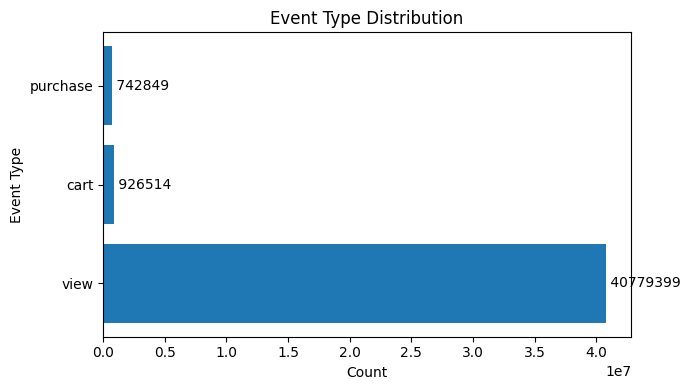

In [6]:
counts = df['event_type'].value_counts()

fig, ax = plt.subplots(figsize=(7, 4))
bars = ax.barh(counts.index, counts.values)

for i, v in enumerate(counts.values):
    ax.text(v, i, f' {v}', va='center')

ax.set_title('Event Type Distribution')
ax.set_xlabel('Count')
ax.set_ylabel('Event Type')

plt.tight_layout()
plt.show()

In [7]:
print(f'total: {len(df)}')
print(f'unique users: {len(df["user_id"].unique())}')
print(f'unique items: {len(df["product_id"].unique())}')
print(f'unique category_ids {len(df["category_id"].unique())}')
print(f'unique category_codes: {len(df["category_code"].unique())}')
print(f'unique brands: {len(df["brand"].unique())}')

total: 42448762
unique users: 3022290
unique items: 166794
unique category_ids 624
unique category_codes: 127
unique brands: 3445


In [8]:
df.sort_values(by='event_time', ascending=True, inplace=True)

In [9]:
df.to_feather('./dataset/preprocessed_data.feather')

In [10]:
pd.read_feather('./dataset/preprocessed_data.feather')

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00+00:00,view,44600062,2103807459595387724,#unknown,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00+00:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01+00:00,view,17200506,2053013559792632471,furniture.living_room.sofa,#unknown,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01+00:00,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04+00:00,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
...,...,...,...,...,...,...,...,...,...
42448755,2019-10-31 23:59:58+00:00,view,12800151,2053013552788144369,#unknown,sony,8.49,544578298,fb46b2fb-493b-477c-8d18-ea1c24c04020
42448757,2019-10-31 23:59:58+00:00,view,1004870,2053013555631882655,electronics.smartphone,samsung,275.25,518956209,6764041a-9285-4869-8a32-a79adf31d212
42448761,2019-10-31 23:59:58+00:00,view,5701038,2053013553970938175,auto.accessories.player,kenwood,128.70,566280422,05b6c62b-992f-4e8e-91f7-961bcb4719cd
42448762,2019-10-31 23:59:59+00:00,view,21407424,2053013561579406073,electronics.clocks,tissot,689.85,513118352,4c14bf2a-2820-4504-929d-046356a5a204
